In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap


In [27]:
data = pd.read_csv('comp_occur.csv')

print(data.info())
print(data['Fold'].value_counts())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fold    523 non-null    object 
 1   V1      523 non-null    float64
 2   V2      523 non-null    float64
 3   V3      523 non-null    float64
 4   V4      523 non-null    float64
 5   V5      523 non-null    float64
 6   V6      523 non-null    float64
 7   V7      523 non-null    float64
 8   V8      523 non-null    float64
 9   V9      523 non-null    float64
 10  V10     523 non-null    float64
 11  V11     523 non-null    float64
 12  V12     523 non-null    float64
 13  V13     523 non-null    float64
 14  V14     523 non-null    float64
 15  V15     523 non-null    float64
 16  V16     523 non-null    float64
 17  V17     523 non-null    float64
 18  V18     523 non-null    float64
 19  V19     523 non-null    float64
 20  V20     523 non-null    float64
 21  V21     523 non-null    int64  
 22  V2

,Fold,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
0,Fold1,0.04,0.01,0.05,0.10,0.03,0.05,0.02,0.09,0.06,...,13,15,15,14,14,24,20,27,2,6
1,Fold1,0.06,0.01,0.02,0.02,0.08,0.11,0.00,0.10,0.03,...,16,6,14,10,14,27,18,31,7,11
2,Fold1,0.08,0.01,0.06,0.06,0.05,0.05,0.03,0.09,0.05,...,6,8,9,8,18,12,10,8,3,6
3,Fold1,0.08,0.00,0.07,0.06,0.03,0.06,0.03,0.05,0.12,...,9,24,14,17,15,16,25,40,4,14
4,Fold1,0.08,0.00,0.02,0.02,0.07,0.09,0.01,0.11,0.03,...,18,20,21,14,18,33,29,34,10,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,Fold4,0.11,0.02,0.05,0.04,0.04,0.05,0.00,0.06,0.04,...,4,10,19,16,6,14,21,16,2,12
519,Fold4,0.03,0.00,0.06,0.05,0.04,0.05,0.02,0.09,0.11,...,4,14,13,7,4,24,24,7,2,9
520,Fold4,0.10,0.00,0.08,0.05,0.02,0.09,0.02,0.05,0.05,...,4,31,18,20,18,64,41,41,6,36
521,Fold4,0.04,0.00,0.07,0.10,0.04,0.04,0.03,0.09,0.11,...,10,54,21,41,27,53,28,40,5,35


In [3]:
# Check for null values
print("Null values in each column:")
print(data.isnull().sum())

# Check for any duplicate rows
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())


Null values in each column:
Fold    0
V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
V10     0
V11     0
V12     0
V13     0
V14     0
V15     0
V16     0
V17     0
V18     0
V19     0
V20     0
V21     0
V22     0
V23     0
V24     0
V25     0
V26     0
V27     0
V28     0
V29     0
V30     0
V31     0
V32     0
V33     0
V34     0
V35     0
V36     0
V37     0
V38     0
V39     0
V40     0
dtype: int64

Number of duplicate rows:
0


In [4]:
label_counts = data['Fold'].value_counts()
print(label_counts)


Fold
Fold3    208
Fold1    174
Fold4    123
Fold2     18
Name: count, dtype: int64


Not enough Data for Fold2

In [5]:
# Separate features and labels
features = data[[f'V{i}' for i in range(1, 41)]]
labels = data['Fold']

# Label encode the target
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


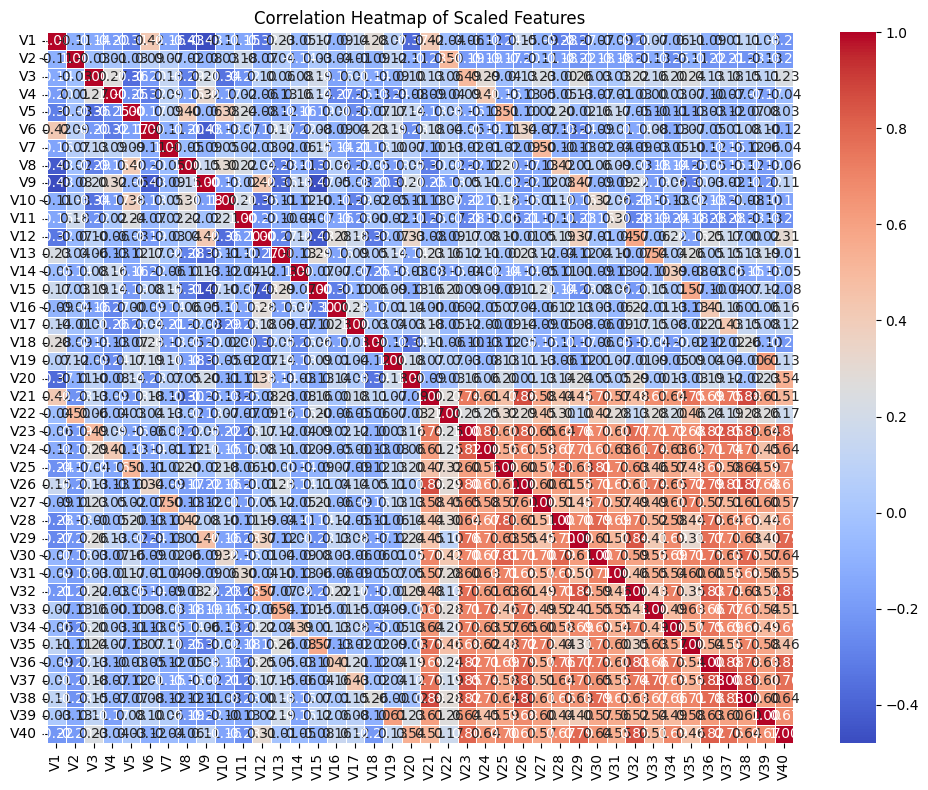

In [6]:
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Compute the correlation matrix
corr_matrix = scaled_df.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Scaled Features')
plt.tight_layout()
plt.show()

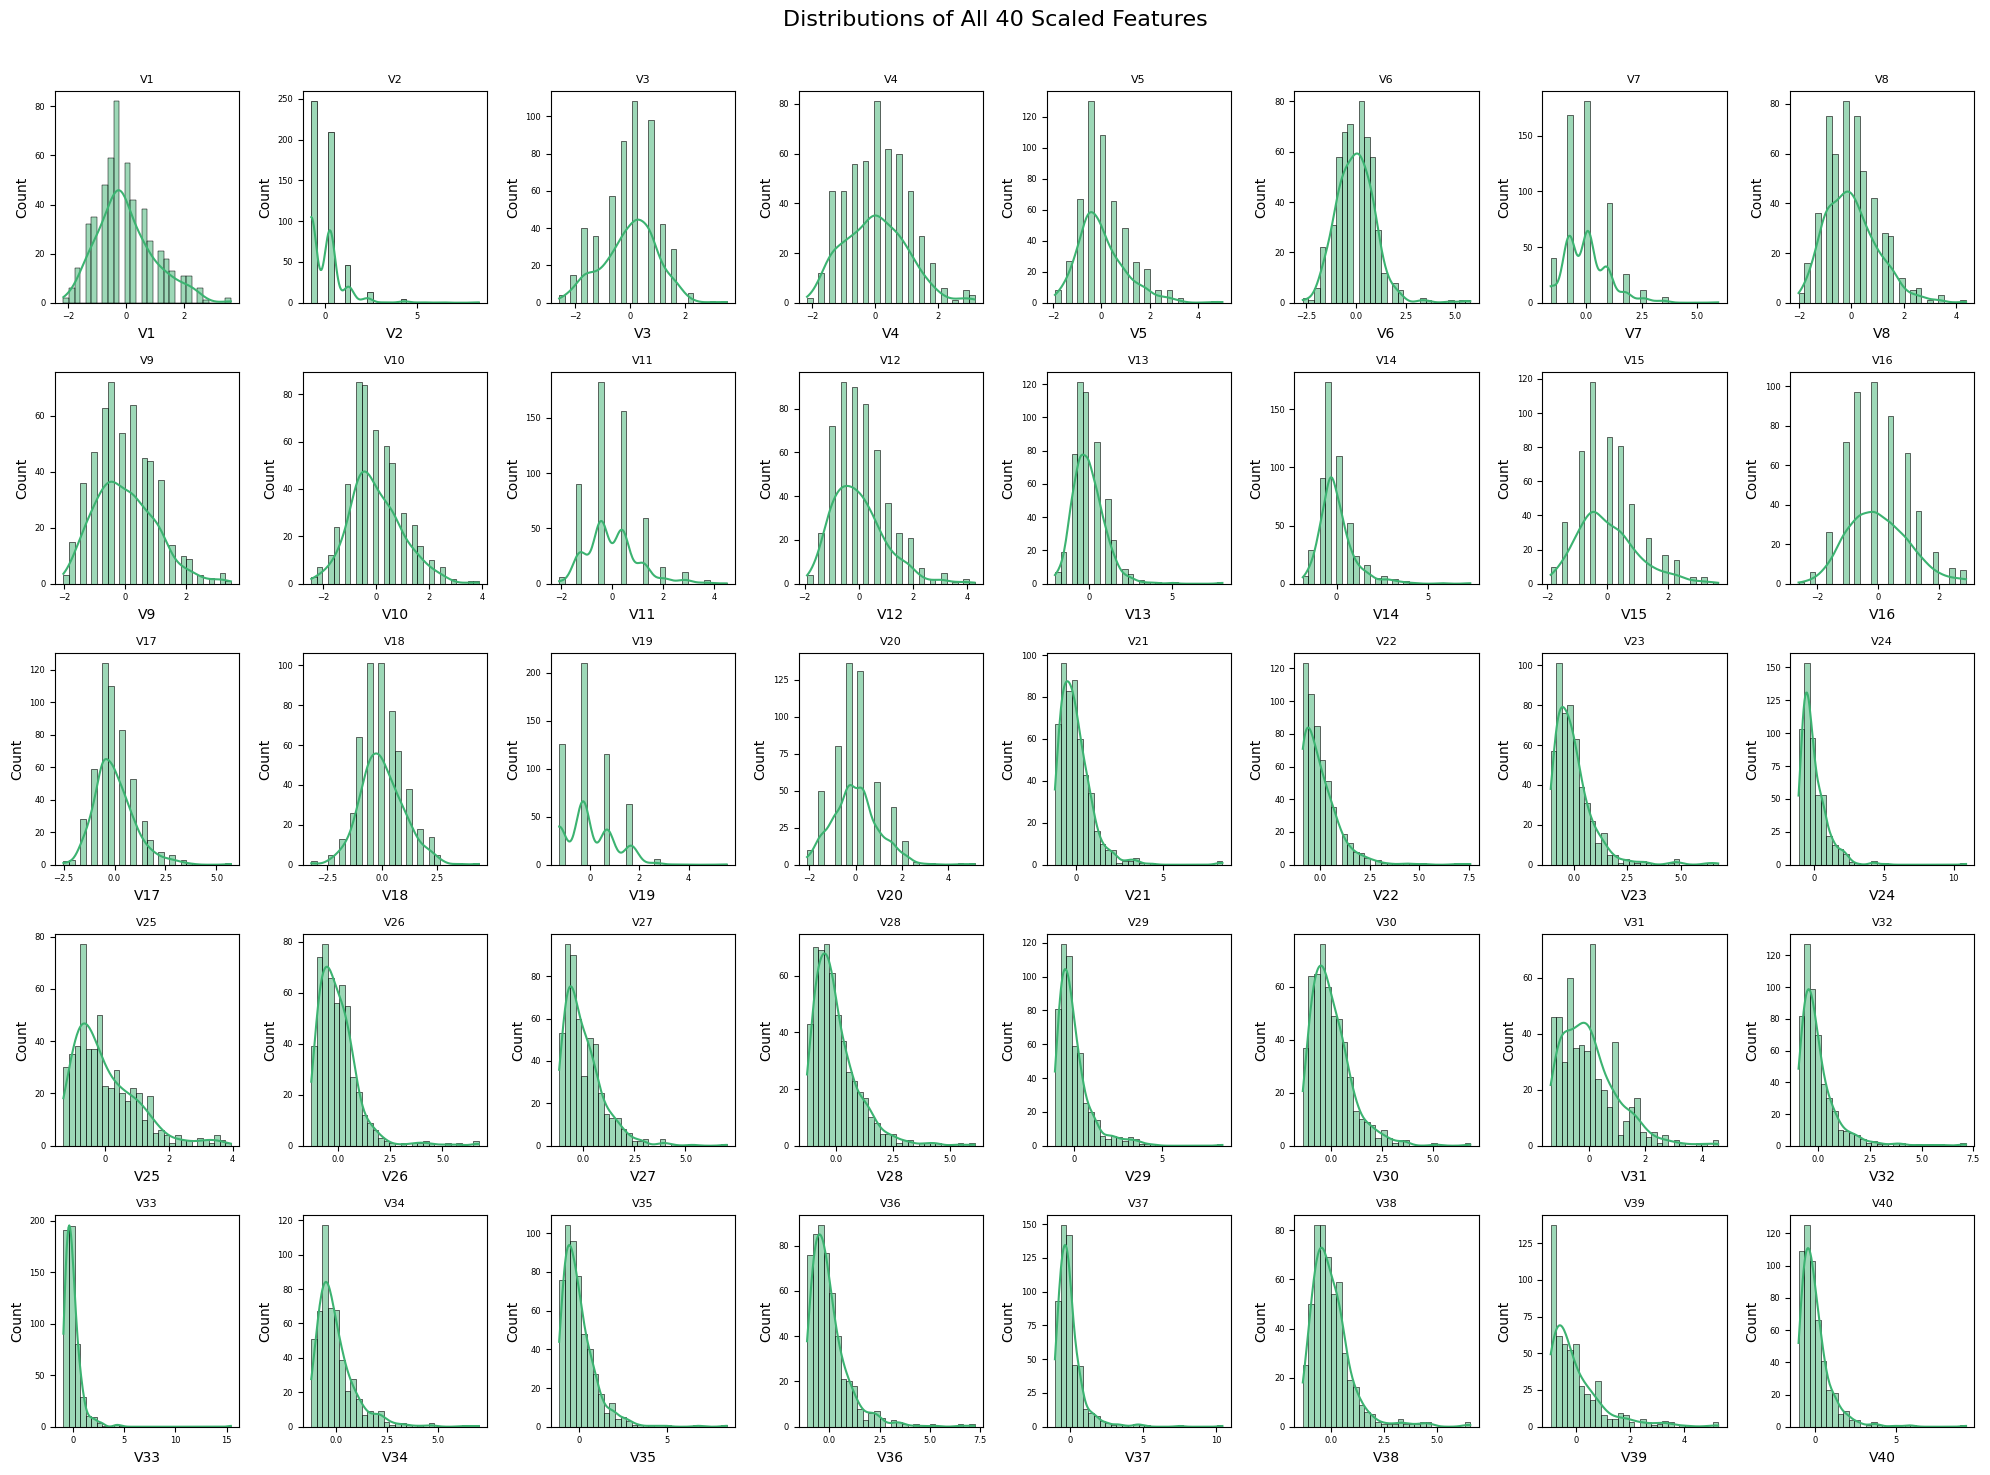

In [7]:
plt.figure(figsize=(20, 15))
for i in range(40):
    plt.subplot(5, 8, i + 1)
    sns.histplot(scaled_df.iloc[:, i], kde=True, bins=30, color="mediumseagreen")
    plt.title(scaled_df.columns[i], fontsize=8)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.tight_layout()

plt.suptitle("Distributions of All 40 Scaled Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Text(0, 0.5, 'cumulative explained variance')

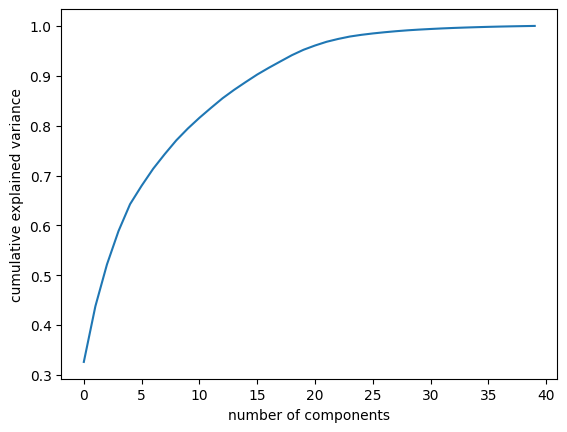

In [8]:
pca = PCA().fit(scaled_features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [9]:
# PCA
pca = PCA(n_components=15)
pca_result = pca.fit_transform(scaled_features)

In [21]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=50)
tsne_result = tsne.fit_transform(pca_result)

In [17]:
# UMAP
umap_reducer = umap.UMAP(n_components=2,  metric='euclidean')
umap_result = umap_reducer.fit_transform(pca_result)

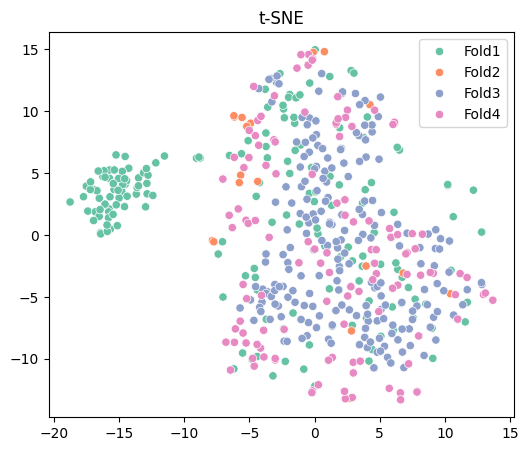

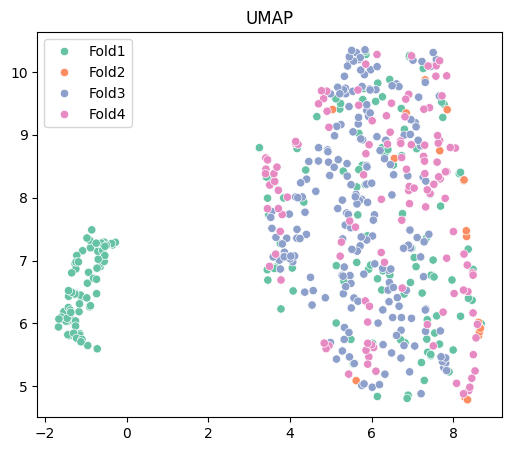

In [22]:
def plot_embedding(embedding, title):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, palette='Set2')
    plt.title(title)
    plt.legend()
    plt.show()


plot_embedding(tsne_result, "t-SNE")
plot_embedding(umap_result, "UMAP")


let visualize data without fold1 and fold2

In [28]:
reduced_data = data[(data['Fold'] != 'Fold1') & (data['Fold'] != 'Fold2')]
reduced_data

,Fold,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
192,Fold3,0.03,0.01,0.05,0.04,0.06,0.03,0.02,0.10,0.10,...,11,79,24,40,14,57,47,50,5,19
193,Fold3,0.06,0.01,0.07,0.09,0.04,0.08,0.02,0.04,0.05,...,14,18,29,12,37,24,25,38,11,18
194,Fold3,0.06,0.01,0.06,0.11,0.01,0.04,0.01,0.13,0.06,...,3,7,7,7,7,8,9,19,2,4
195,Fold3,0.12,0.01,0.05,0.12,0.02,0.07,0.02,0.04,0.08,...,8,5,16,9,19,10,9,16,1,6
196,Fold3,0.09,0.00,0.08,0.07,0.04,0.06,0.02,0.06,0.08,...,20,28,31,20,21,29,40,43,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,Fold4,0.11,0.02,0.05,0.04,0.04,0.05,0.00,0.06,0.04,...,4,10,19,16,6,14,21,16,2,12
519,Fold4,0.03,0.00,0.06,0.05,0.04,0.05,0.02,0.09,0.11,...,4,14,13,7,4,24,24,7,2,9
520,Fold4,0.10,0.00,0.08,0.05,0.02,0.09,0.02,0.05,0.05,...,4,31,18,20,18,64,41,41,6,36
521,Fold4,0.04,0.00,0.07,0.10,0.04,0.04,0.03,0.09,0.11,...,10,54,21,41,27,53,28,40,5,35


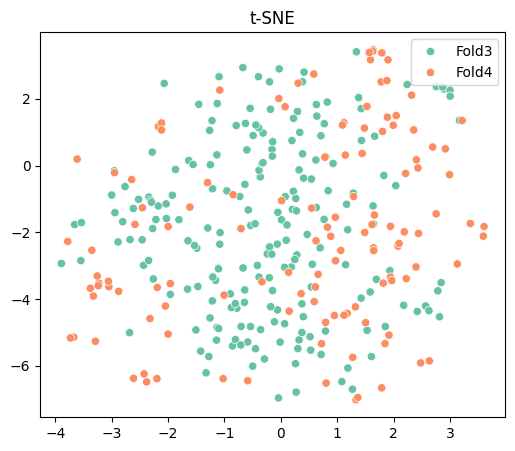

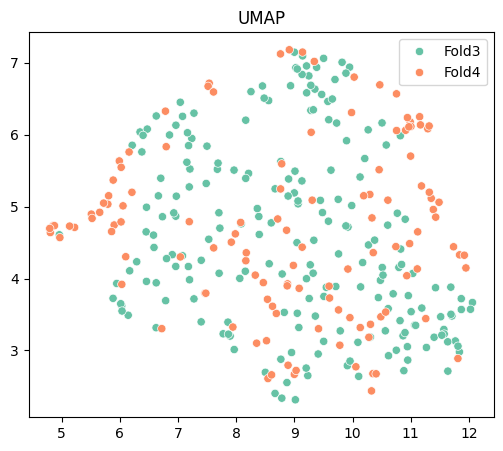

In [32]:
# Separate features and labels
features = reduced_data[[f'V{i}' for i in range(1, 41)]]
labels = reduced_data['Fold']

# Label encode the target
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



# Separate features and labels
features = reduced_data[[f'V{i}' for i in range(1, 41)]]
labels = reduced_data['Fold']

# Label encode the target
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# PCA
pca = PCA(n_components=15)
pca_result = pca.fit_transform(scaled_features)

# t-SNE
tsne = TSNE(n_components=2, perplexity=100)
tsne_result = tsne.fit_transform(pca_result)

# UMAP
umap_reducer = umap.UMAP(n_components=2,  metric='euclidean')
umap_result = umap_reducer.fit_transform(pca_result)



plot_embedding(tsne_result, "t-SNE")
plot_embedding(umap_result, "UMAP")
